<a href="https://colab.research.google.com/github/dallanzzz/bdifinal/blob/main/FinalProjectFinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly
import plotly.express as px
import plotly.graph_objects as go
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart

no display found. Using non-interactive Agg backend


# **DATA INSPECTION**

In [2]:
df = pd.read_csv('https://github.com/dallanzzz/bdifinal/blob/main/high_diamond_ranked_10min.csv?raw=true') 

In [3]:
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df.tail(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,0,0,16266,7.0,17321,207,44,927,-58,20.7,1626.6,9,2,0,6,6,4,1,1,0,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [5]:
numrows = df.shape[0]
numcols = df.shape[1]

print('There are' ,numrows, 'rows and', numcols, 'columns in the League of Legends dataset')

There are 9879 rows and 40 columns in the League of Legends dataset


In [6]:
df.sample(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
724,4520567149,0,20,3,1,9,8,11,1,1,0,0,17429,6.8,17309,211,48,720,-183,21.1,1742.9,16,4,0,8,9,10,0,0,0,0,16709,6.8,17492,210,50,-720,183,21.0,1670.9
2072,4519515708,1,19,1,1,11,1,18,1,1,0,0,18190,7.6,20017,225,65,4069,3954,22.5,1819.0,16,5,0,1,11,1,0,0,0,0,14121,6.6,16063,224,51,-4069,-3954,22.4,1412.1
1884,4502024151,0,12,1,0,2,11,3,0,0,0,0,13832,6.6,16157,203,47,-6240,-4315,20.3,1383.2,13,3,1,11,2,11,2,1,1,1,20072,7.6,20472,233,49,6240,4315,23.3,2007.2
192,4489494110,1,25,5,1,14,3,15,0,0,0,0,20317,7.4,20330,212,54,6153,3916,21.2,2031.7,13,4,0,3,14,4,0,0,0,0,14164,6.4,16414,196,45,-6153,-3916,19.6,1416.4
6635,4417418392,1,18,2,1,14,2,14,1,1,0,0,19185,7.0,18543,196,48,5794,3899,19.6,1918.5,16,4,0,2,14,1,0,0,0,0,13391,6.0,14644,166,46,-5794,-3899,16.6,1339.1
4213,4472209518,1,18,5,1,7,2,7,2,1,1,0,17039,7.2,18656,220,64,3032,2096,22.0,1703.9,20,2,0,2,7,0,0,0,0,0,14007,6.6,16560,185,54,-3032,-2096,18.5,1400.7
4503,4524313607,0,15,2,1,5,6,8,0,0,0,0,15292,7.0,18345,187,54,-1805,-504,18.7,1529.2,18,3,0,6,5,10,1,1,0,0,17097,7.0,18849,241,64,1805,504,24.1,1709.7
552,4467311315,1,91,2,1,8,6,9,1,1,0,0,17001,6.8,17576,187,47,91,-339,18.7,1700.1,16,6,0,6,8,6,0,0,0,0,16910,7.0,17915,237,44,-91,339,23.7,1691.0
7594,4508388395,1,16,2,1,15,2,17,1,1,0,1,21883,7.8,20941,252,55,7980,4916,25.2,2188.3,12,1,0,2,15,0,0,0,0,0,13903,6.4,16025,193,44,-7980,-4916,19.3,1390.3
4105,4524447556,0,14,5,0,4,5,4,1,1,0,0,15129,7.0,17887,197,61,-1330,-639,19.7,1512.9,14,4,1,5,4,4,0,0,0,0,16459,7.0,18526,241,56,1330,639,24.1,1645.9


In [7]:
df.isnull().sum()
#No missing values in this dataset, which is good

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [8]:
df_sorted_blue_kills = df.sort_values(by= 'blueKills')
df_sorted_blue_kills
#This shows us the number of kills blue team has from least to most

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
2625,4519998999,0,14,2,0,0,4,0,1,0,1,0,13805,6.8,17253,221,52,-2009,-2396,22.1,1380.5,59,1,1,4,0,5,1,1,0,0,15814,7.2,19649,243,59,2009,2396,24.3,1581.4
3217,4465441499,1,19,4,0,0,3,0,0,0,0,0,13674,6.8,17384,229,52,-1159,-157,22.9,1367.4,18,2,1,3,0,3,1,1,0,0,14833,6.8,17541,230,40,1159,157,23.0,1483.3
1167,4454340438,0,15,1,0,0,4,0,0,0,0,0,13580,6.4,16571,207,48,-4279,-4529,20.7,1358.0,37,2,1,4,0,2,2,1,1,0,17859,7.6,21100,266,82,4279,4529,26.6,1785.9
2876,4518106435,0,16,1,0,0,4,0,0,0,0,0,14052,6.6,16542,229,48,-2502,-3183,22.9,1405.2,38,4,1,4,0,4,0,0,0,0,16554,7.0,19725,249,60,2502,3183,24.9,1655.4
193,4523340688,0,15,0,0,0,5,0,0,0,0,0,14091,6.4,16184,233,60,-2216,-2730,23.3,1409.1,56,2,1,5,0,8,1,1,0,0,16307,7.0,18914,229,60,2216,2730,22.9,1630.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,4520799474,1,11,1,1,18,10,15,1,1,0,0,21352,7.6,20771,224,59,4287,3938,22.4,2135.2,13,0,0,10,18,11,0,0,0,0,17065,6.8,16833,135,35,-4287,-3938,13.5,1706.5
5461,4489955666,1,18,2,1,18,6,16,2,1,1,0,21893,7.6,21511,243,56,7125,3657,24.3,2189.3,9,2,0,6,18,0,0,0,0,0,14768,7.2,17854,176,42,-7125,-3657,17.6,1476.8
9551,4509560405,1,15,0,0,19,4,22,1,1,0,0,22173,7.4,20408,234,45,7154,6032,23.4,2217.3,12,0,1,4,19,5,1,0,1,0,15019,6.0,14376,189,38,-7154,-6032,18.9,1501.9
8251,4511011052,1,37,4,0,19,3,25,0,0,0,1,23278,7.8,22125,240,48,8667,7645,24.0,2327.8,15,3,1,3,19,7,0,0,0,0,14611,6.2,14480,189,46,-8667,-7645,18.9,1461.1


In [9]:
df_groupby_wins = df.groupby(['blueWins']).count()
df_groupby_wins['gameId']
#This shows how many games blue wins or loses
#Faily equal (50%)

blueWins
0    4949
1    4930
Name: gameId, dtype: int64

# **CORRELATION HEATMAP**

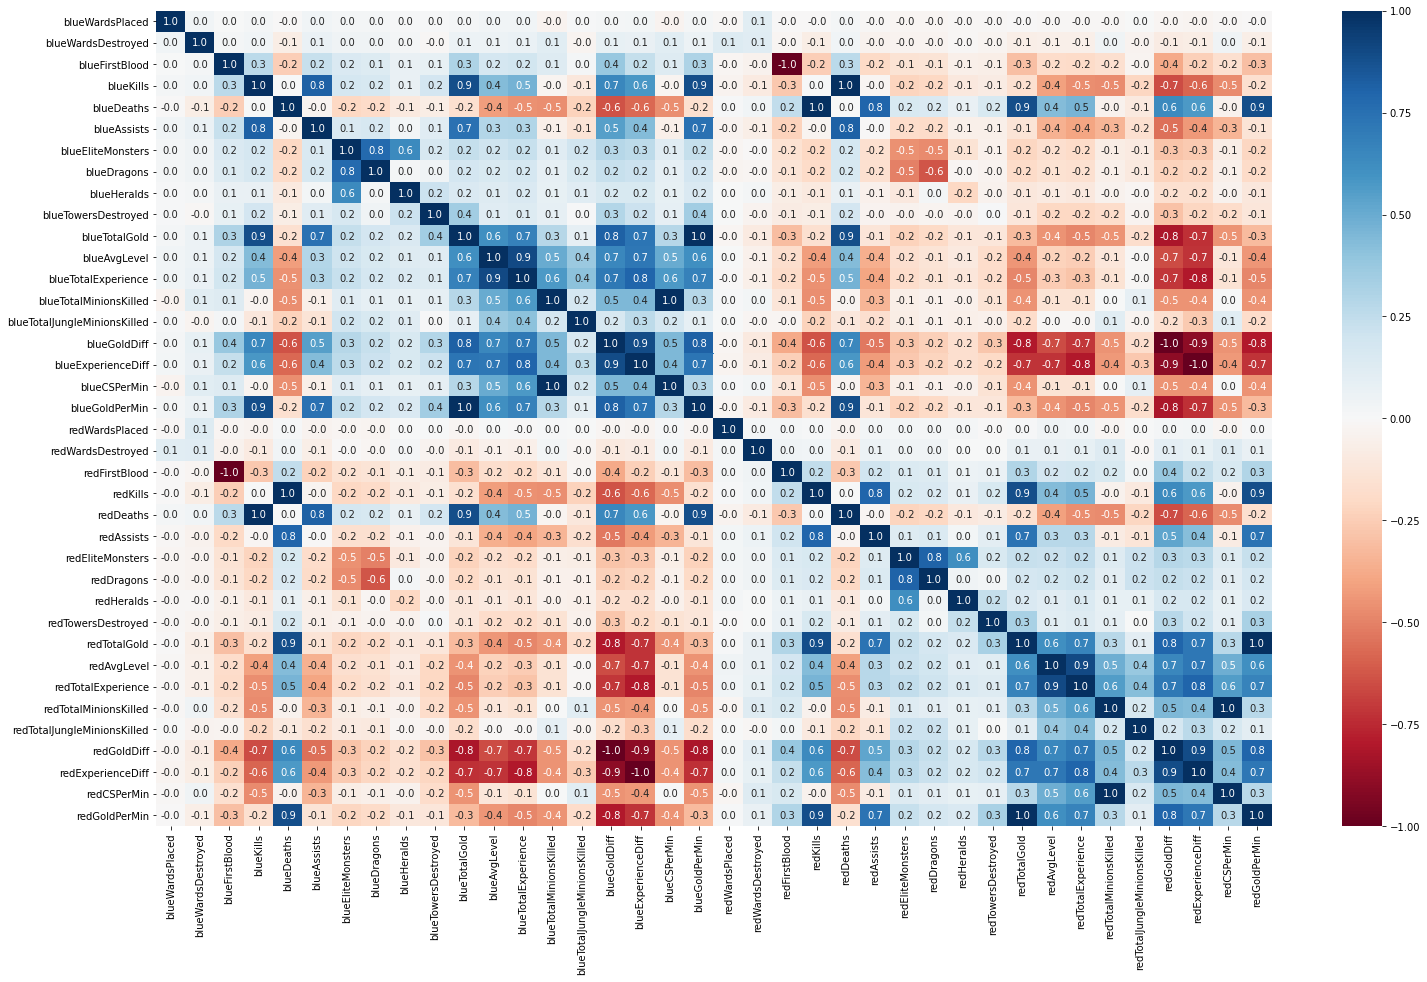

In [10]:
fig_dims = (25,15)
fig, ax =plt.subplots(figsize=fig_dims)
fig = sns.heatmap(df.drop(['blueWins','gameId'],axis=1).corr(), fmt=".1f", annot=True, ax=ax, cmap='RdBu');

# **HISTOGRAM**

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=df['blueTotalExperience'], name ='Blue Team'
        
    )
)

fig.add_trace(
    go.Histogram(
        x=df['redTotalExperience'], name = 'Red Team'
    )
)

fig.update_layout(barmode='group',title="Distribution of Total Exprience of Each Team",
    xaxis_title="Total Experience",
    yaxis_title="Frequency Count")
fig.update_traces(opacity=1)

fig.show()


# **3D SCATTER PLOT**

In [12]:
df['blueWins'].astype("category")
df_sample = df.sample(frac=0.1)
figblue = px.scatter_3d(df_sample, x='blueAssists', y='blueKills', z='blueDeaths',color='blueWins', width=800, height=800, title='Blue Team K/D/A Stats on Outcome', template='plotly_dark')

figblue.show()
figred = px.scatter_3d(df_sample, x='redAssists', y='redKills', z='redDeaths',color='blueWins', width=800, height=800, title='Red Team K/D/A Stats on Outcome', template='plotly_dark')

figred.show()
#Plot for each team is quite identical to each other and the color is inversed, showing consistency

# **BUILDING LOGISTIC REGRESSION PREDICTIVE MODEL**

In [13]:
data_df = df.copy()
data_df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [14]:
data_df = data_df.drop("gameId", axis=1)
data_df.columns
#Removing unnecessary variables from the dataset

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [15]:
X = data_df.drop("blueWins", axis =1)

y = data_df["blueWins"]
#Splitting predictor and response objects

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(train_y.value_counts())
print(test_y.value_counts())
#Creating Train and Test data with 80/20 random split

0    3959
1    3944
Name: blueWins, dtype: int64
0    990
1    986
Name: blueWins, dtype: int64


In [17]:
norm = MinMaxScaler()
X = norm.fit_transform(X)
#Standardizing the dataset

In [18]:
logit_reg = LogisticRegressionCV(penalty="l2", Cs=100, solver='liblinear', class_weight = "None", cv=10,

max_iter=500, scoring="accuracy", random_state=1)

model = logit_reg.fit(train_X, train_y)
#Fitting logistic regression model

In [19]:

classificationSummary(train_y, model.predict(train_X))
classificationSummary(test_y, model.predict(test_X))
#Shows performance of the model through confusion matrix

Confusion Matrix (Accuracy 0.7355)

       Prediction
Actual    0    1
     0 2920 1039
     1 1051 2893
Confusion Matrix (Accuracy 0.7212)

       Prediction
Actual   0   1
     0 709 281
     1 270 716


In [20]:
classes = model.predict(test_X)

print(metrics.classification_report(test_y, classes))
#More info on performance of model classification report

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       990
           1       0.72      0.73      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



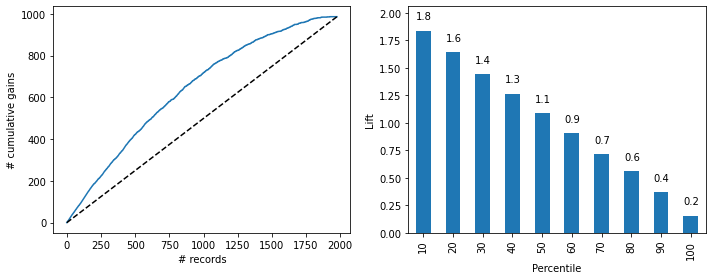

In [21]:
logit_reg_pred = logit_reg.predict(test_X)


logit_reg_proba = logit_reg.predict_proba(test_X)
logit_result = pd.DataFrame({'actual': test_y,

'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.tight_layout()
plt.show()
#Gain and Lift Charts to further show the gains of using the predictive model

# **BUILDING RANDOM TREE PREDICTIVE MODEL**

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(train_y.value_counts())
print(test_y.value_counts())
#Splitting the dataset into Train and Test dataset with 80/20 ratio

0    3959
1    3944
Name: blueWins, dtype: int64
0    990
1    986
Name: blueWins, dtype: int64


In [23]:
rfTree = RandomForestClassifier(n_estimators=500, random_state=1)

rfTree.fit(train_X, train_y)
#Fitting and creating the random forest model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
classificationSummary(train_y, rfTree.predict(train_X))
classificationSummary(test_y, rfTree.predict(test_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3959    0
     1    0 3944
Confusion Matrix (Accuracy 0.7151)

       Prediction
Actual   0   1
     0 711 279
     1 284 702


In [25]:
classes = rfTree.predict(test_X)

print(metrics.classification_report(test_y, classes))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       990
           1       0.72      0.71      0.71       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



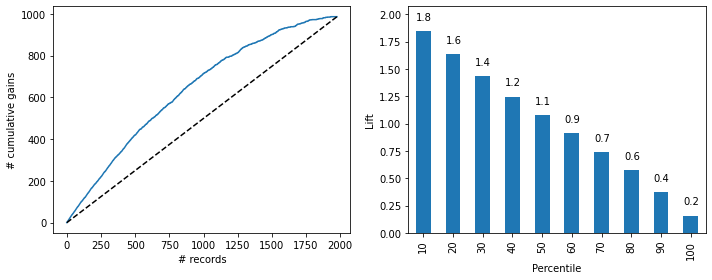

In [26]:
rfTree_pred = rfTree.predict(test_X)
rfTree_proba = rfTree.predict_proba(test_X)
rfTree_result = pd.DataFrame({'actual': test_y,

'p(0)': [p[0] for p in rfTree_proba],
'p(1)': [p[1] for p in rfTree_proba],
'predicted': rfTree_pred })
df = rfTree_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.tight_layout()
plt.show()

*It turns out that both the Logistic Regression Model and Random Tree Model are equally as accurate, with minimal difference in accuracy*

These 2 predictive models' objective is to be able to give an accurate prediction on which team is more likely to win, given the statistics of the first 10 minutes of the game.

These models can be applied to, for example, Sports Betting events (in legal circumstances) to give someone a competitive advantage to win more of their bets. Instead of having a 50% intuitive chance of winning, these models are used to offer an approximately 70% chance to win through statistical analysis.